<a href="https://colab.research.google.com/github/viniciusrpb/cic0269_natural_language_processing/blob/main/lectures/cap08_2_metricas_avaliacao_desempenho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capítulo 8 - Classificação de Textos

## 8.2. Métricas de Avaliação de Desempenho de Classificação

Nesta seção vamos estudar como avaliar e comparar os desempenhos entre classificadores

In [1]:
import numpy as np

## Começando pela Classificação Binária

Considere um dataset qualquer em que os labels sejam apenas denotados por "positivo" (representado pelo inteiro 0) ou "negativo" (representando pelo inteiro 1). A label de interesse (target) é a positiva. Suponha as seguintes predições:

In [2]:
y_true = [0,0,1,1,0,0,1,0,1,0,1,0,1,1,0]
y_pred = [0,0,1,1,0,1,1,0,0,0,1,0,0,0,0]

Construindo a matriz de confusão

In [3]:
mat_conf = [[0,0],[0,0]]

for i in range(0,len(y_true)):
    mat_conf[y_true[i]][y_pred[i]]+=1

In [4]:
np.array(mat_conf)

array([[7, 1],
       [3, 4]])

In [5]:
tp = mat_conf[0][0]
fp = mat_conf[1][0]
fn = mat_conf[0][1]
tn = mat_conf[1][1]

In [6]:
tn

4

Acurácia (Taxa de classificação correta): métrica não confiável para dados com desbalanceamento entre classes

In [7]:
acc = (tp+tn)/(tp+fn+fp+tn)
print(f'Acuracia: {acc:.3f}')

Acuracia: 0.733


Precisão

In [8]:
prec = tp/(tp+fp)
print(f'Precisao: {prec:.3f}')

Precisao: 0.700


Revocação

In [9]:
rec = tp/(tp+fn)
print(f'Revocacao: {rec:.3f}')

Revocacao: 0.875


F1-Score

In [10]:
f1 = 2*(prec*rec)/(prec+rec)
print(f'F1 Score: {f1:.3f}')

F1 Score: 0.778


## Generalizando para Classificação Multi-classes

Vamos tratar aqui a abordadem "One Against All" para calcular as métricas acima, em que tomamos classe por classe

In [11]:
y_true = [0,2,1,0,0,1,1,2,0,1,1,0,1,2,1,2,1,0,2,1,0]
y_pred = [0,2,1,2,0,1,2,2,0,1,2,1,2,0,0,0,1,0,2,1,1]

Extraindo-se o suporte para cada classe, isto é, a quantidade de instâncias verdadeiras de cada classe:

In [12]:
sup = []
c = 3
for i in range(0,c):
    v = len([x for x in y_true if x == i])
    sup.append(v)
    print(f'Suporte Label {i}: {v}')

Suporte Label 0: 7
Suporte Label 1: 9
Suporte Label 2: 5


In [13]:
mat_conf = []
c = 3
n = len(y_true)

for i in range(0,c):
    mat_conf.append([0]*c)

for i in range(0,len(y_true)):
    mat_conf[y_true[i]][y_pred[i]]+=1

In [14]:
np.array(mat_conf)

array([[4, 2, 1],
       [1, 5, 3],
       [2, 0, 3]])

Acurácia geral

In [15]:
tp_0 = mat_conf[0][0]
tp_1 = mat_conf[1][1]
tp_2 = mat_conf[2][2]
acc = (tp_0+tp_1+tp_2)/(n)
print(f'Acuracia: {acc:.3f}')

Acuracia: 0.571


In [16]:
prec = [0]*c
rec = [0]*c
f1 = [0]*c

Métricas para a classe "0"

In [17]:
tp = mat_conf[0][0]
fp = mat_conf[1][0]+mat_conf[2][0]
fn = mat_conf[0][1]+mat_conf[0][2]

In [18]:
prec[0] = tp/(tp+fp)
print(f'Precisao: {prec[0]:.3f}')
rec[0] = tp/(tp+fn)
print(f'Revocacao: {rec[0]:.3f}')
f1[0] = 2*(prec[0]*rec[0])/(prec[0]+rec[0])
print(f'F1 Score: {f1[0]:.3f}')

Precisao: 0.571
Revocacao: 0.571
F1 Score: 0.571


Métricas para a classe "1"

In [19]:
tp = mat_conf[1][1]
fp = mat_conf[0][1]+mat_conf[2][1]
fn = mat_conf[1][0]+mat_conf[1][2]

In [20]:
prec[1] = tp/(tp+fp)
print(f'Precisao: {prec[1]:.3f}')
rec[1] = tp/(tp+fn)
print(f'Revocacao: {rec[1]:.3f}')
f1[1] = 2*(prec[1]*rec[1])/(prec[1]+rec[1])
print(f'F1 Score: {f1[1]:.3f}')

Precisao: 0.714
Revocacao: 0.556
F1 Score: 0.625


Métricas para a classe "2"

In [21]:
tp = mat_conf[2][2]
fp = mat_conf[0][2]+mat_conf[1][2]
fn = mat_conf[2][0]+mat_conf[2][1]

In [22]:
prec[2] = tp/(tp+fp)
print(f'Precisao: {prec[2]:.3f}')
rec[2] = tp/(tp+fn)
print(f'Revocacao: {rec[2]:.3f}')
f1[2] = 2*(prec[2]*rec[2])/(prec[2]+rec[2])
print(f'F1 Score: {f1[2]:.3f}')

Precisao: 0.429
Revocacao: 0.600
F1 Score: 0.500


**Métricas Weighted-Average e Macro**

Atenção: para dados que apresentam desbalanceamento entre classes, a abordagem *Macro* é a mais apropriada por desconsiderar o suporte (quantidade de instâncias por classe) no cálculo da precisão, da revocação e da F1-Score gerais.

Precisão Weighted-Average

In [23]:
avg_weighted_prec = 0
for i in range(0,len(prec)):
    avg_weighted_prec+=prec[i]*(sup[i]/n)

print(f'Weighted-Avg Precisao: {avg_weighted_prec:.3f}')

Weighted-Avg Precisao: 0.599


Precisão Macro

In [24]:
prec_macro = 0
for i in range(0,len(prec)):
    prec_macro+=prec[i]
prec_macro/=c

print(f'Precisao Macro: {prec_macro:.3f}')

Precisao Macro: 0.571


Revocação Weighted-Average

In [25]:
avg_weighted_rec = 0
for i in range(0,len(rec)):
    avg_weighted_rec+=rec[i]*(sup[i]/n)

print(f'Weighted-Avg Revocacao: {avg_weighted_rec:.3f}')

Weighted-Avg Revocacao: 0.571


Revocação Macro

In [26]:
rec_macro = 0
for i in range(0,len(rec)):
    rec_macro+=rec[i]
rec_macro/=c

print(f'Revocacao Macro: {rec_macro:.3f}')

Revocacao Macro: 0.576


F1-Score Weighted-Average


In [27]:
avg_weighted_f1 = 0
for i in range(0,len(f1)):
    avg_weighted_f1+=f1[i]*(sup[i]/n)
#avg_weighted_f1/=c

print(f'Weighted-Avg F1-Score: {avg_weighted_f1:.3f}')

Weighted-Avg F1-Score: 0.577


Macro F1-Score

In [28]:
f1_macro = 0
for i in range(0,len(f1)):
    f1_macro+=f1[i]
f1_macro/=c

print(f'F1-Score Macro: {f1_macro:.3f}')

F1-Score Macro: 0.565


### Matriz de Confusão e Cálculo de Métricas com Bibliotecas Python

Pode-se utilizar implementações de bibliotecas para calcular as métricas e gerar visualizações para melhor entendimento.

**Matriz de confusão**

A documentação da matriz de confusão no sklearn pode ser encontrada [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html). Basta utilizar os seguintes comandos:

In [29]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, y_pred))

[[4 2 1]
 [1 5 3]
 [2 0 3]]


Como apresentar visualmente essa matriz de confusão? Podemos utilizar alguma das APIs gráficas do Python, como matplotlib e plotly.

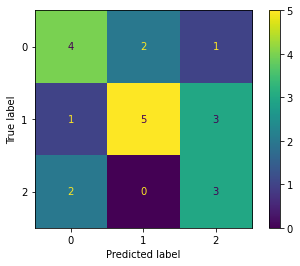

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

Classification Report

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.57      0.57         7
           1       0.71      0.56      0.63         9
           2       0.43      0.60      0.50         5

    accuracy                           0.57        21
   macro avg       0.57      0.58      0.57        21
weighted avg       0.60      0.57      0.58        21

